# Crop Disease Prediction

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\Major Project\dataset\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1900 files belonging to 38 classes.


### Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\Major Project\dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1900 files belonging to 38 classes.


### Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolutional layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


60/60 [==============================] - 411s 7s/step - loss: 3.6634 - accuracy: 0.0468 - val_loss: 3.4604 - val_accuracy: 0.0947
Epoch 2/10
60/60 [==============================] - 351s 6s/step - loss: 3.2787 - accuracy: 0.1047 - val_loss: 2.9386 - val_accuracy: 0.1763
Epoch 3/10
60/60 [==============================] - 380s 6s/step - loss: 2.8626 - accuracy: 0.1926 - val_loss: 2.5578 - val_accuracy: 0.2863
Epoch 4/10
60/60 [==============================] - 376s 6s/step - loss: 2.4441 - accuracy: 0.2853 - val_loss: 2.1866 - val_accuracy: 0.3837
Epoch 5/10
60/60 [==============================] - 351s 6s/step - loss: 2.1911 - accuracy: 0.3647 - val_loss: 1.9765 - val_accuracy: 0.4263
Epoch 6/10
60/60 [==============================] - 342s 6s/step - loss: 1.8902 - accuracy: 0.4321 - val_loss: 2.0967 - val_accuracy: 0.4189
Epoch 7/10
60/60 [==============================] - 343s 6s/step - loss: 1.6363 - accuracy: 0.5026 - val_loss: 1.7002 - val_accuracy: 0.5200
Epoch 8/10


### Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

60/60 [==============================] - 75s 1s/step - loss: 0.6456 - accuracy: 0.8095
Training accuracy: 0.8094736933708191


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

60/60 [==============================] - 72s 1s/step - loss: 1.5800 - accuracy: 0.5605
Validation accuracy: 0.5605263113975525


### Saving the Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [3.6634020805358887,
  3.2787158489227295,
  2.862557888031006,
  2.444061517715454,
  2.19114089012146,
  1.8902207612991333,
  1.6363458633422852,
  1.442393183708191,
  1.2369543313980103,
  1.046798586845398],
 'accuracy': [0.04684210568666458,
  0.10473684221506119,
  0.1926315724849701,
  0.28526315093040466,
  0.3647368550300598,
  0.43210527300834656,
  0.5026316046714783,
  0.5526315569877625,
  0.6194736957550049,
  0.6784210801124573],
 'val_loss': [3.4603524208068848,
  2.9386093616485596,
  2.557799816131592,
  2.186640977859497,
  1.9765195846557617,
  2.096695899963379,
  1.7002484798431396,
  1.6386381387710571,
  1.649750828742981,
  1.5800352096557617],
 'val_accuracy': [0.09473684430122375,
  0.1763157844543457,
  0.28631579875946045,
  0.3836842179298401,
  0.4263157844543457,
  0.41894736886024475,
  0.5199999809265137,
  0.5431578755378723,
  0.5268421173095703,
  0.5605263113975525]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

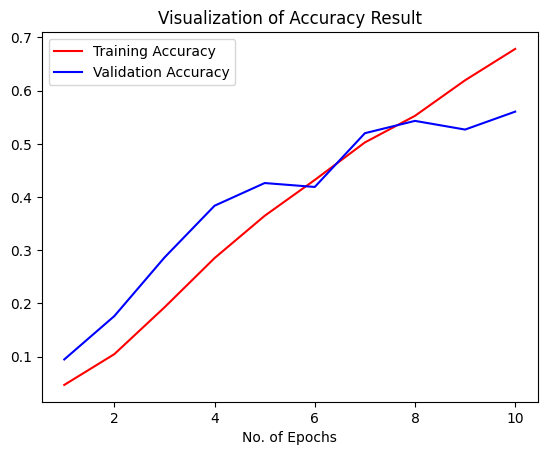

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\Major Project\dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1900 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1900/1900 [==============================] - 144s 76ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(1900,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(1900,), dtype=int64, numpy=array([10, 35,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                 Apple__Apple_scab       0.37      0.38      0.37        50
                                  Apple__Black_rot       0.35      0.72      0.47        50
                           Apple__Cedar_apple_rust       0.81      0.26      0.39        50
                                    Apple__healthy       0.50      0.56      0.53        50
                                Blueberry__healthy       0.34      0.42      0.38        50
          Cherry_(including_sour)___Powdery_mildew       0.61      0.34      0.44        50
                 Cherry_(including_sour)___healthy       0.72      0.62      0.67        50
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.70      0.32      0.44        50
                       Corn_(maize)___Common_rust_       0.84      0.86      0.85        50
               Corn_(maize)___Northern_Leaf_Blight       0.80      0.48      0.

### Confusion Matrix Visualization

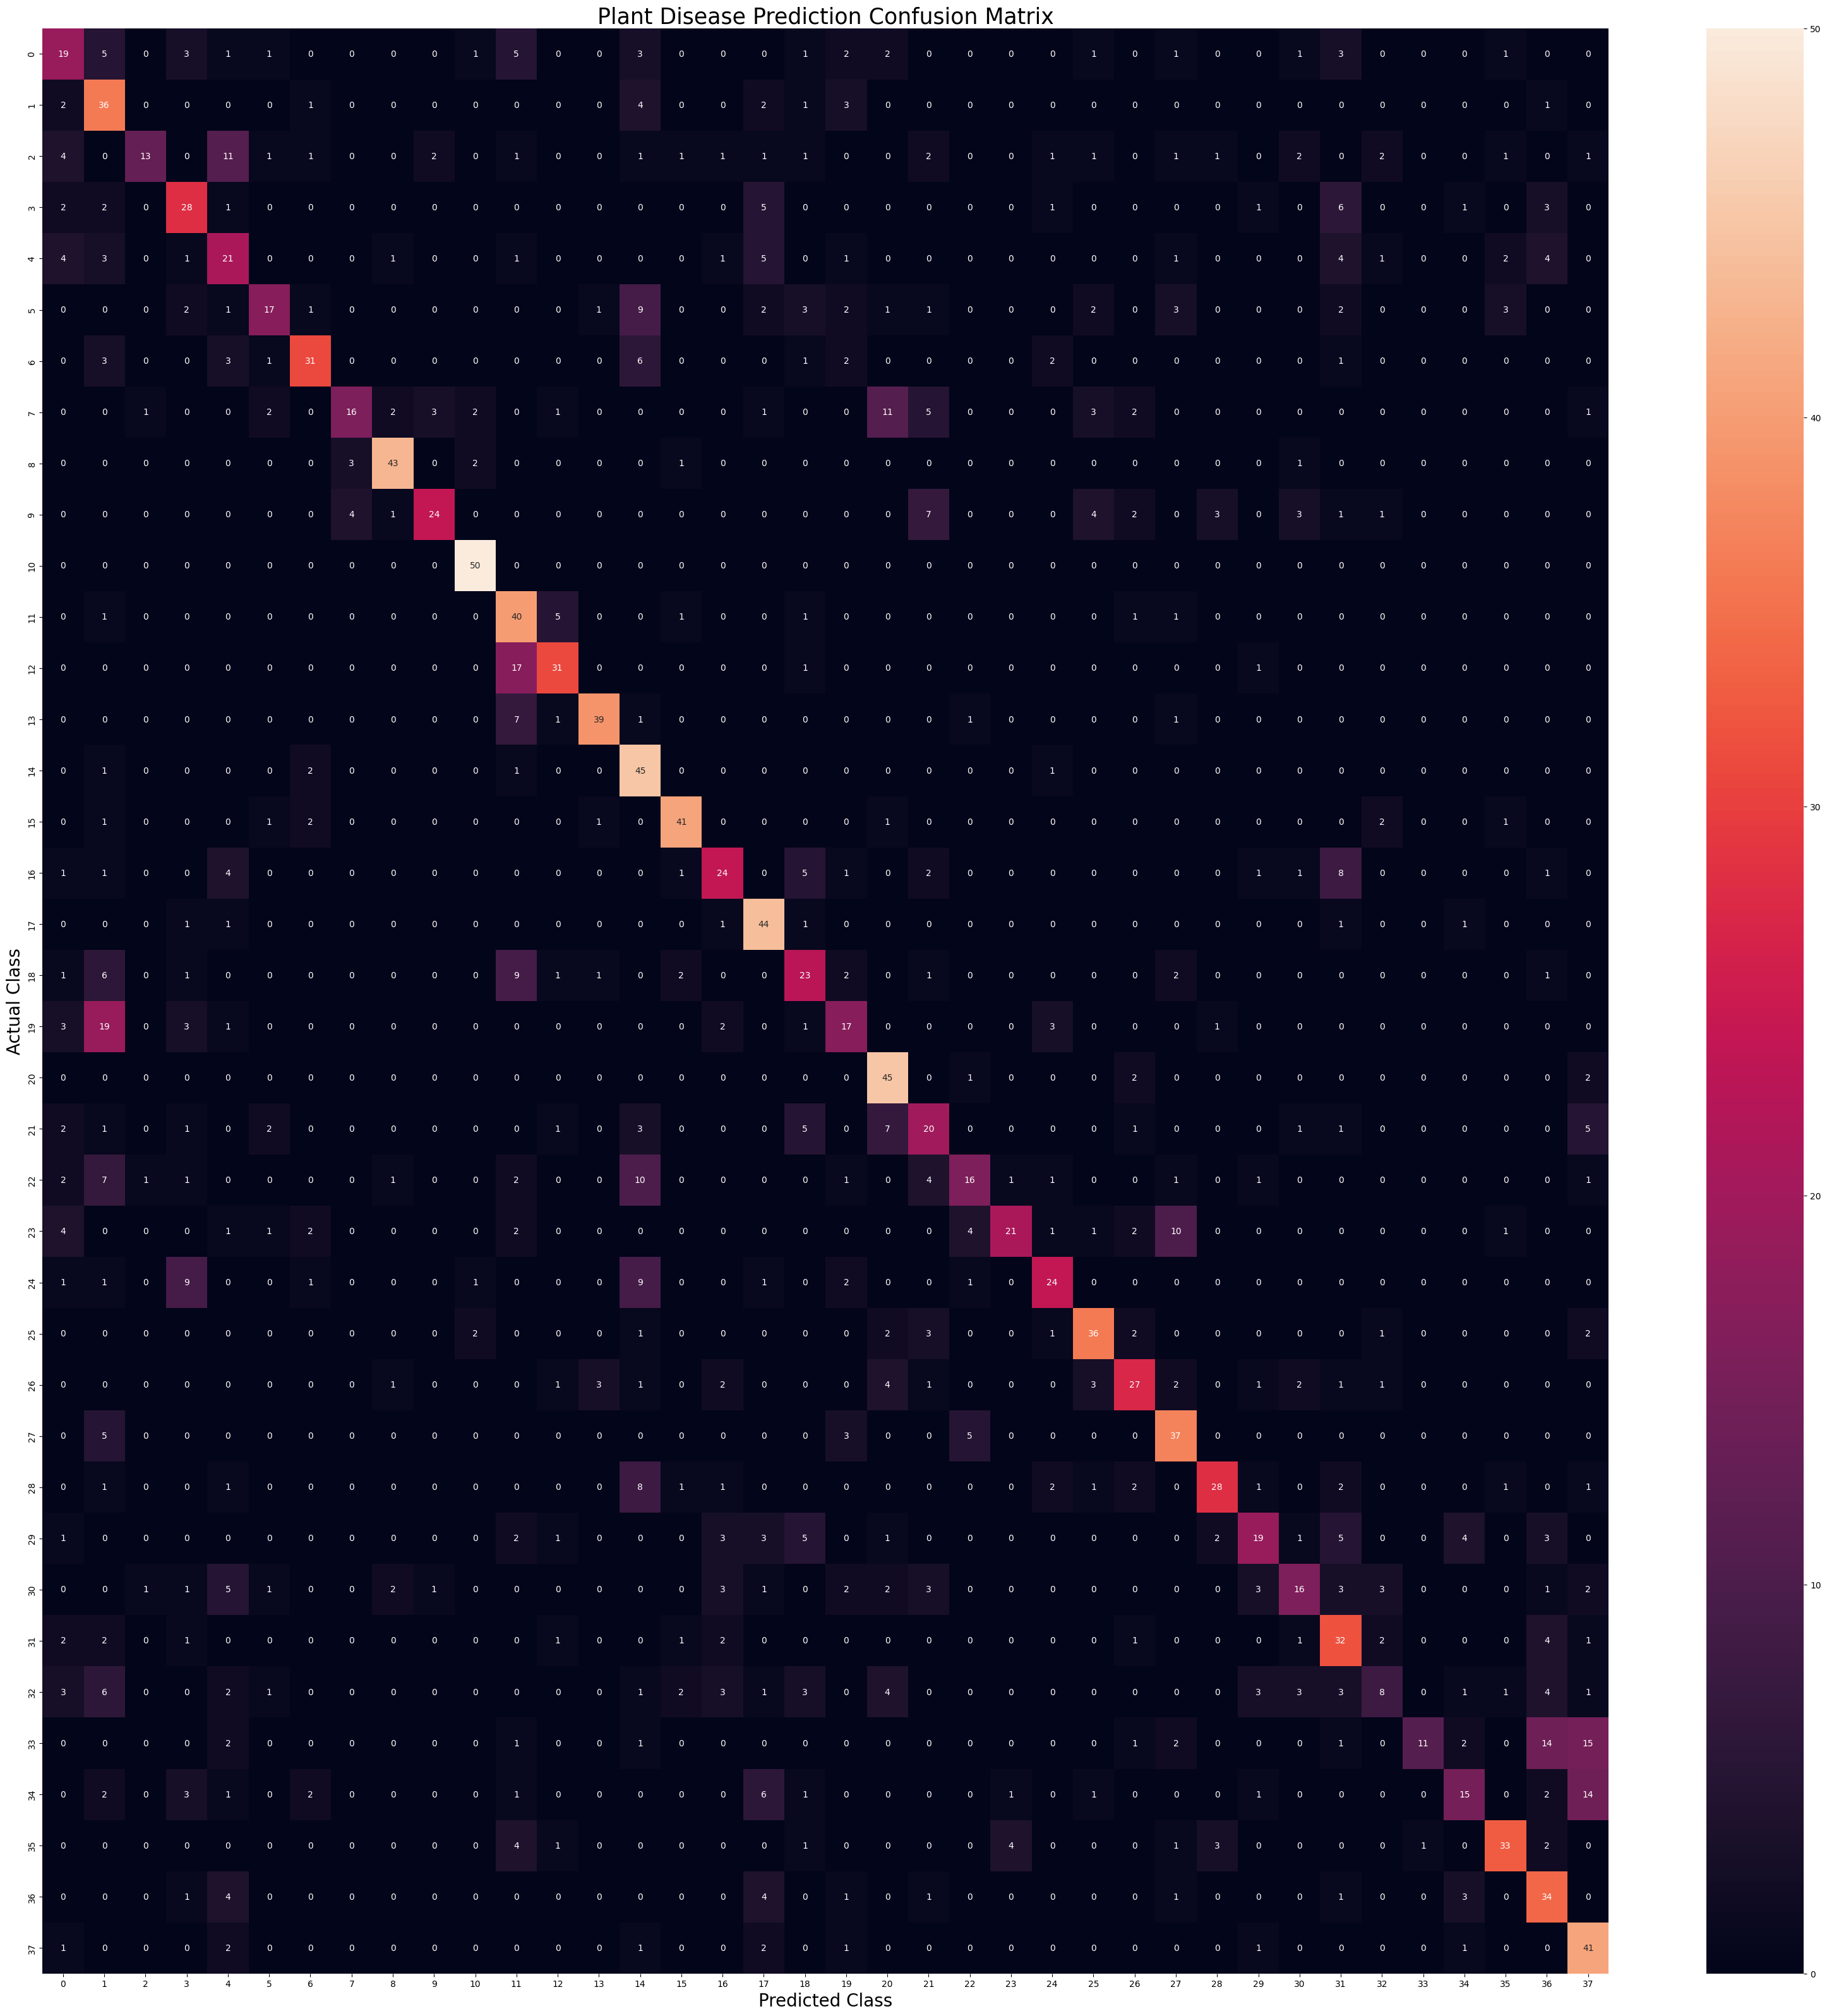

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

# Set image size (MobileNetV2 expects 224x224)
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 38

# Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Only rescale validation/test set
val_datagen = ImageDataGenerator(rescale=1./255)

# Directory paths (adjust if needed)
train_dir = r'D:\Major Project\dataset\train'
val_dir = r'D:\Major Project\dataset\valid'
test_dir = r'D:\Major Project\dataset\test'

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained MobileNetV2 (without top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Build model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Evaluate on validation
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")



Found 1900 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


Epoch 1/20


60/60 [==============================] - 525s 9s/step - loss: 4.0533 - accuracy: 0.0311 - val_loss: 3.5148 - val_accuracy: 0.0795
Epoch 2/20
60/60 [==============================] - 457s 8s/step - loss: 3.6289 - accuracy: 0.0563 - val_loss: 3.3880 - val_accuracy: 0.1384
Epoch 3/20
60/60 [==============================] - 352s 6s/step - loss: 3.4705 - accuracy: 0.0937 - val_loss: 3.2643 - val_accuracy: 0.2089
Epoch 4/20
60/60 [==============================] - 395s 7s/step - loss: 3.3091 - accuracy: 0.1200 - val_loss: 3.1142 - val_accuracy: 0.2637
Epoch 5/20
60/60 [==============================] - 368s 6s/step - loss: 3.1963 - accuracy: 0.1568 - val_loss: 2.9391 - val_accuracy: 0.3289
Epoch 6/20
60/60 [==============================] - 370s 6s/step - loss: 3.0297 - accuracy: 0.1832 - val_loss: 2.7411 - val_accuracy: 0.3937
Epoch 7/20
60/60 [=====

In [2]:

# Save the trained model
model.save(r'D:\Major Project\trained_plant_disease_model_mobilenetv2.h5')  # Save model as .h5 file


d:\Major Project\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
